Evaluate the performance of the latest model (caco3/toc_nmf+svr_model_20210823.joblib) on newly added case study cores (`build_database_07.ipynb`: 'SO264-69-2', 'LV28-44-3-n').

In [1]:
import numpy as np
import pandas as pd

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Case study

In [2]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20220629.csv', index_col=0)
merge_df[merge_df.core.isin(['SO264-69-2', 'LV28-44-3-n'])]

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.50,0.447396,17.104352,SO264-69-2,105.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.15,0.682441,3.896173,SO264-69-2,205.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.70,0.517439,1.521280,SO264-69-2,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.72,0.512596,1.728299,SO264-69-2,405.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.58,0.487851,0.767879,SO264-69-2,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.592500,0.400000,LV28-44-3-n,10875.0
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.517500,0.820000,LV28-44-3-n,10925.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.552000,0.000000,LV28-44-3-n,10975.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.507500,0.390000,LV28-44-3-n,11025.0


In [16]:
merge_df[(merge_df['CaCO3%']<0) & merge_df.core.isin(['SO264-69-2', 'LV28-44-3-n'])]

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.303160,-0.442980,SO264-69-2,9305.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.28,0.836358,-4.636128,SO264-69-2,13205.0


Okay there are negative CaCO3 values in core SO264-69-2, so it's better to deal with TOC and CaCO3 repectively.

In [3]:
from joblib import load
from  nwp_cali import PrepareData
case_cores = ['SO264-69-2', 'LV28-44-3-n']

measurement = 'CaCO3%'
model = load('models/{}_nmf+svr_model_20210823.joblib'.format(measurement[:-1].lower()))
prepare = PrepareData(measurement=measurement)
data_df = prepare.select_casestudy(case_cores = case_cores)
X, y = prepare.produce_Xy(data_df)

caco3_df = data_df[['core', 'mid_depth_mm']].copy()
caco3_df[measurement] = y
caco3_df['{}_pred'.format(measurement)] = np.exp(model.predict(X))
caco3_df

,core,mid_depth_mm,CaCO3%,CaCO3%_pred
0,SO264-69-2,105.0,17.104352,9.643838
1,SO264-69-2,205.0,3.896173,4.844910
2,SO264-69-2,305.0,1.521280,0.506014
3,SO264-69-2,405.0,1.728299,0.353026
4,SO264-69-2,505.0,0.767879,0.329278
...,...,...,...,...
288,LV28-44-3-n,10875.0,0.400000,0.344058
289,LV28-44-3-n,10925.0,0.820000,0.337580
290,LV28-44-3-n,10975.0,0.010000,0.305676
291,LV28-44-3-n,11025.0,0.390000,0.340866


In [4]:
measurement = 'TOC%'
model = load('models/{}_nmf+svr_model_20210823.joblib'.format(measurement[:-1].lower()))
prepare = PrepareData(measurement=measurement)
data_df = prepare.select_casestudy(case_cores = case_cores)
X, y = prepare.produce_Xy(data_df)

toc_df = data_df[['core', 'mid_depth_mm']].copy()
toc_df[measurement] = y
toc_df['{}_pred'.format(measurement)] = np.exp(model.predict(X))

toc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   core          293 non-null    object 
 1   mid_depth_mm  293 non-null    float64
 2   TOC%          293 non-null    float64
 3   TOC%_pred     293 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.4+ KB


In [5]:
caco3_df.index = ['{}_{:0>5d}'.format(core, depth) for core, depth in zip(caco3_df.core, caco3_df.mid_depth_mm.astype(int))]
toc_df.index = ['{}_{:0>5d}'.format(core, depth) for core, depth in zip(toc_df.core, toc_df.mid_depth_mm.astype(int))]

In [6]:
y_df = pd.concat(
    [toc_df, caco3_df.loc[:, ['CaCO3%', 'CaCO3%_pred']]], 
    join='outer', axis=1)
y_df

,core,mid_depth_mm,TOC%,TOC%_pred,CaCO3%,CaCO3%_pred
SO264-69-2_00105,SO264-69-2,105.0,0.447396,0.161898,17.104352,9.643838
SO264-69-2_00205,SO264-69-2,205.0,0.682441,0.218412,3.896173,4.844910
SO264-69-2_00305,SO264-69-2,305.0,0.517439,0.138848,1.521280,0.506014
SO264-69-2_00405,SO264-69-2,405.0,0.512596,0.140063,1.728299,0.353026
SO264-69-2_00505,SO264-69-2,505.0,0.487851,0.139859,0.767879,0.329278
...,...,...,...,...,...,...
LV28-44-3-n_10875,LV28-44-3-n,10875.0,0.592500,0.143737,0.400000,0.344058
LV28-44-3-n_10925,LV28-44-3-n,10925.0,0.517500,0.124619,0.820000,0.337580
LV28-44-3-n_10975,LV28-44-3-n,10975.0,0.552000,0.150389,0.010000,0.305676
LV28-44-3-n_11025,LV28-44-3-n,11025.0,0.507500,0.136354,0.390000,0.340866


In [7]:
y_df.to_csv('results/predictions_casestudies_{}.csv'.format(date))

## Scores

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for measurement in ['CaCO3%', 'TOC%']:
    print(measurement)
    for core in case_cores:
        print('{}\tRMSE: {:.2f}\tR2: {:.2f}'.format(
                core,
                mean_squared_error(
                    y_df.loc[y_df.core == core, measurement].dropna(), 
                    y_df.loc[y_df.core == core, '{}_pred'.format(measurement)].dropna(),
                    squared=False),
                r2_score(
                    y_df.loc[y_df.core == core, measurement].dropna(), 
                    y_df.loc[y_df.core == core, '{}_pred'.format(measurement)].dropna())
            )
        )


CaCO3%
SO264-69-2	RMSE: 3.52	R2: 0.58
LV28-44-3-n	RMSE: 0.65	R2: 0.62
TOC%
SO264-69-2	RMSE: 0.18	R2: -2.35
LV28-44-3-n	RMSE: 0.55	R2: -3.89


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for measurement in ['CaCO3%', 'TOC%']:
    print('{}\tRMSE: {:.2f}\tR2: {:.2f}'.format(
            measurement,
            mean_squared_error(
                y_df.loc[:, measurement].dropna(), 
                y_df.loc[:, '{}_pred'.format(measurement)].dropna(),
                squared=False),
            r2_score(
                y_df.loc[:, measurement].dropna(), 
                y_df.loc[:, '{}_pred'.format(measurement)].dropna())
        )
    )

CaCO3%	RMSE: 2.80	R2: 0.61
TOC%	RMSE: 0.37	R2: -0.96


In [11]:
(merge_df.core == 'SO264-69-2').sum()

183

In [12]:
(merge_df.core == 'LV28-44-3-n').sum()

110

Hmm... SO264-69-2 has a worse performance (large in RMSE, small in R2) in CaCO3 than LV28-44-3-n. In contrary, TOC is opposite (but both have bad R2).

## Visualization

In [2]:
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20220629.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220629.csv', index_col=0)
area_df = pd.read_csv('data/CaBr_20220629.csv', index_col=0)

## Check spectra
to see if the spectra are beyond the boundary condition.

In [5]:
merge_df.loc[merge_df.core.isin(['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']), merge_df.columns[:2048]]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
range_df = pd.read_csv('results/spectral_range_20220104.csv', index_col=0)
range_df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,...,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.000000,2350.0,2350.0,2350.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000213,0.0,0.0,0.000142
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010314,0.0,0.0,0.006876
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.333333


In [12]:
range_df.loc['mean', :]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2043    0.000000
2044    0.000213
2045    0.000000
2046    0.000000
2047    0.000142
Name: mean, Length: 2048, dtype: float64

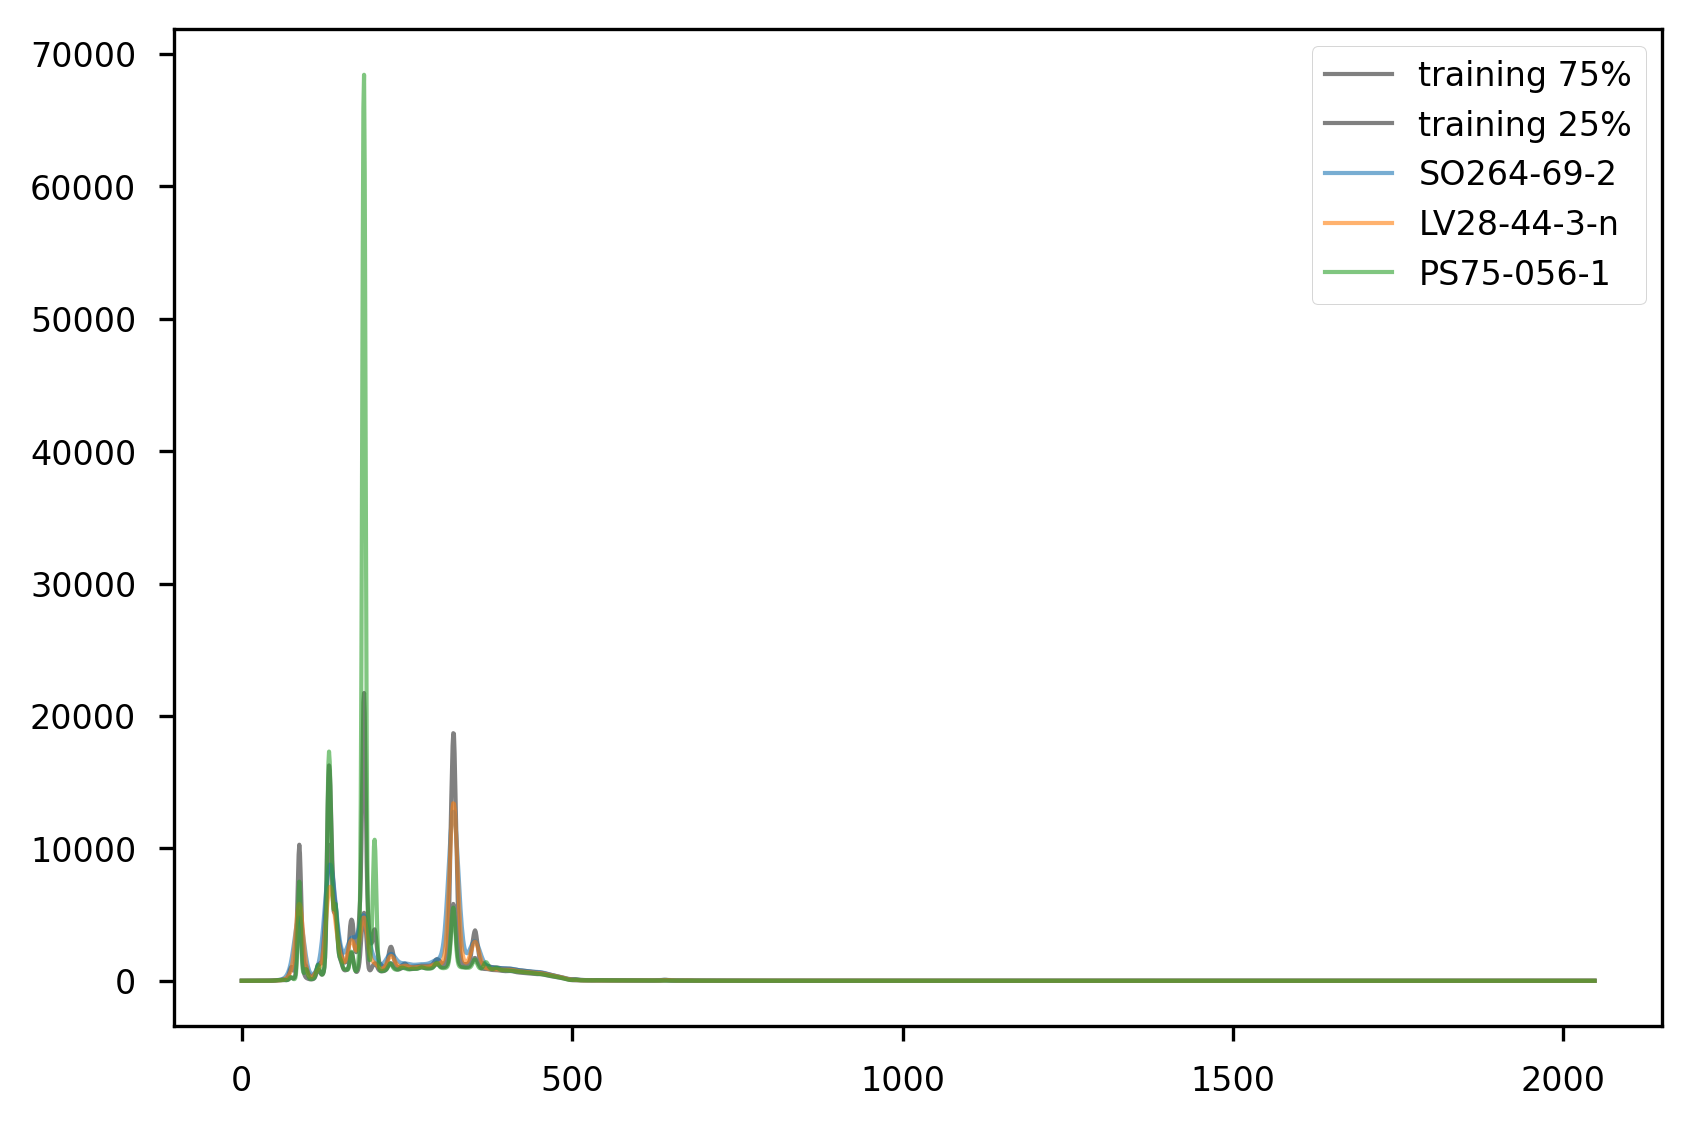

In [22]:
plt.plot(range(2048), range_df.loc['75%', :].values, label='training 75%', c='gray', lw=1)
plt.plot(range(2048), range_df.loc['25%', :].values, label='training 25%', c='gray', lw=1)

for core in ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']:
    plt.plot(
        range(2048),
        merge_df.loc[merge_df.core == core, merge_df.columns[:2048]].mean().values,
        label=core,
        alpha=.6, lw=1
        )

plt.legend()
plt.savefig('results/spetra_range_case_{}.png'.format(date))

Well, only PS75-056-1 falls beyond the spetra range. The rest tow cores haivng worse performance of TOC actually fall within the boundary. Therefore, use only spectra range to check our models' applicability is not sufficient.

## Draw with measurement and proxy

20220630


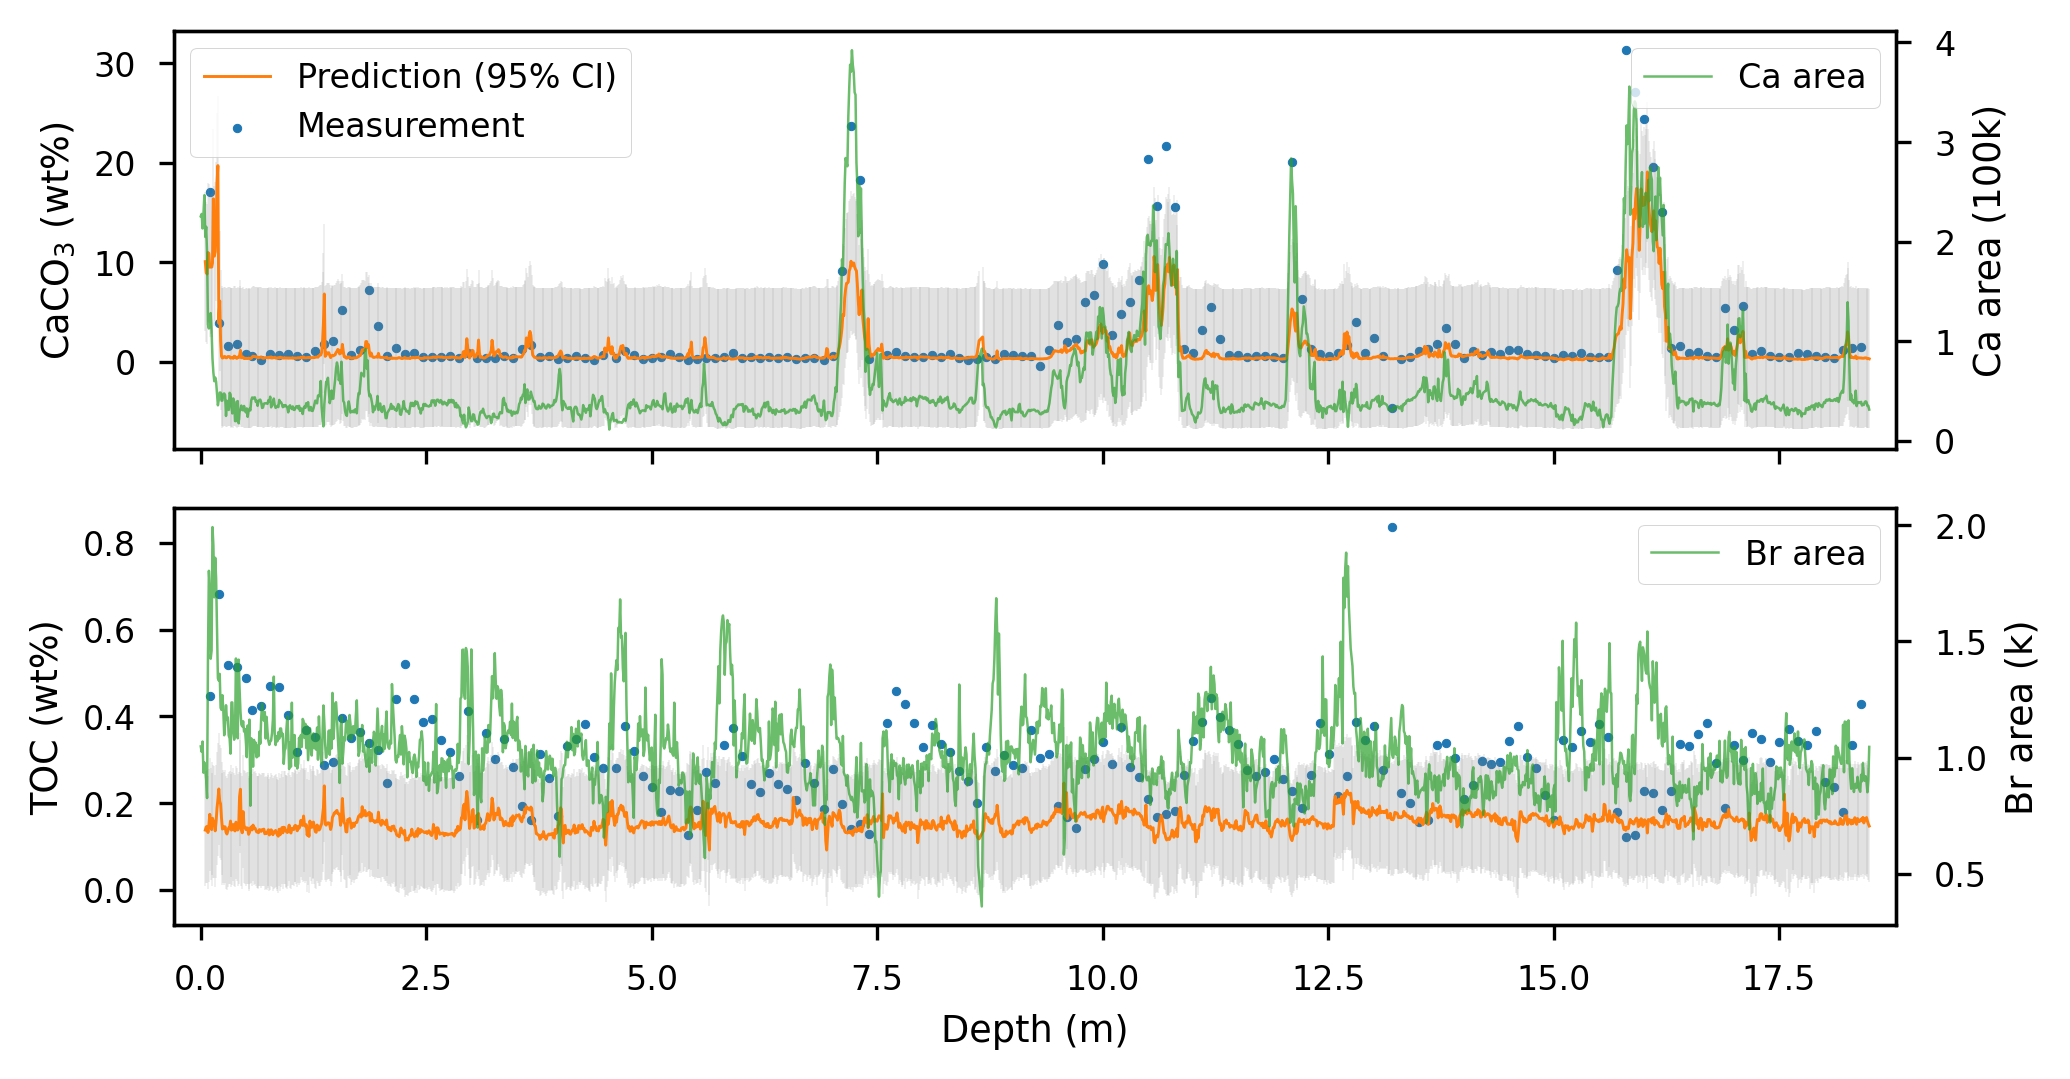

In [16]:
core = 'SO264-69-2'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]
aa = area_df[area_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')
    
    ax2 = ax.twinx()
    
    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.3, 18.8)
        ax.legend()
        ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7, label='Ca area')
        ax2.set_ylabel('Ca area (100k)')
        ax2.legend(loc='upper right')
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7, label='Br area')
        ax2.set_ylabel('Br area (k)')
        ax2.legend(loc='upper right')
       

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

20220630


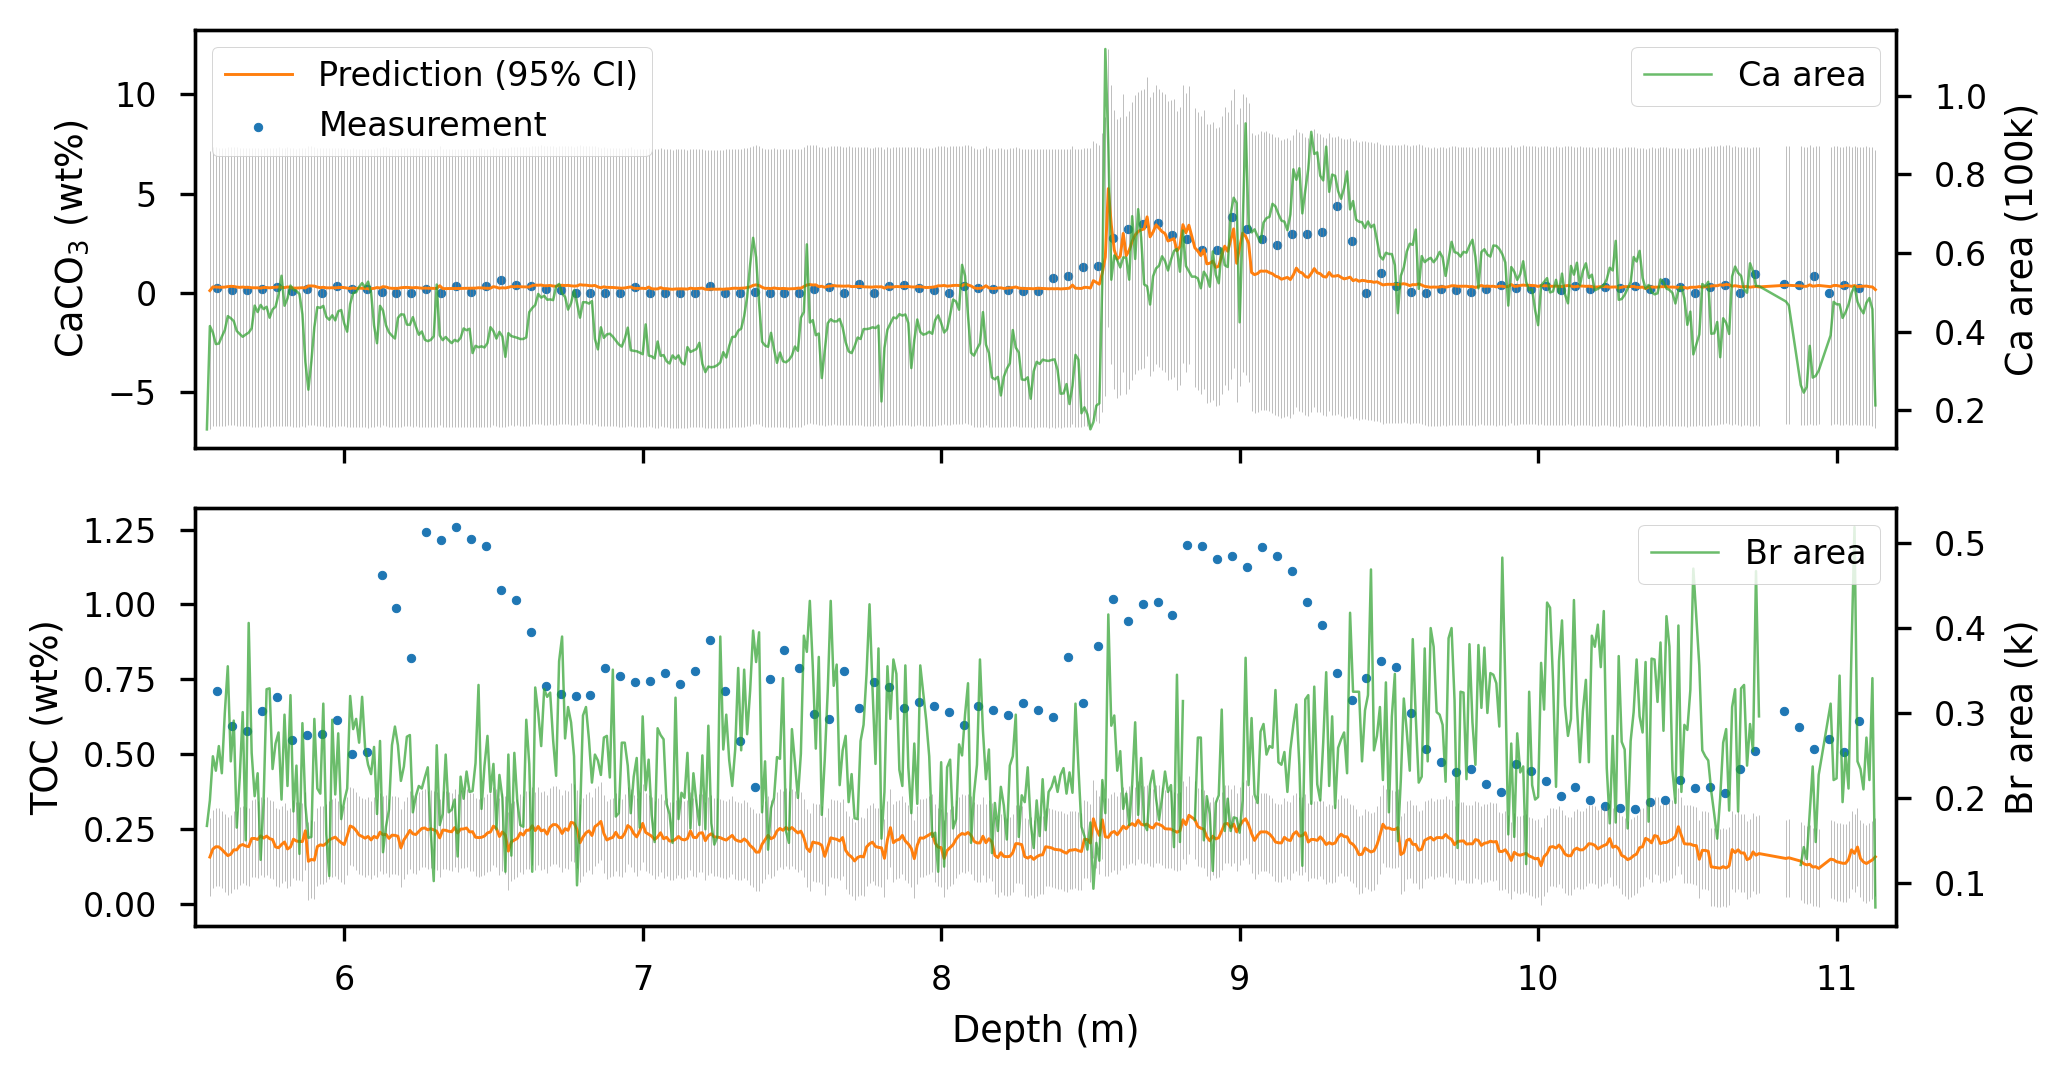

In [20]:
core = 'LV28-44-3-n'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]
aa = area_df[area_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.2, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')
    
    ax2 = ax.twinx()
    
    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(5.5, 11.2)
        ax.legend(loc='upper left')
        ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7, label='Ca area')
        ax2.set_ylabel('Ca area (100k)')
        ax2.legend(loc='upper right')
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7, label='Br area')
        ax2.set_ylabel('Br area (k)')
        ax2.legend(loc='upper right')
       

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

20220630


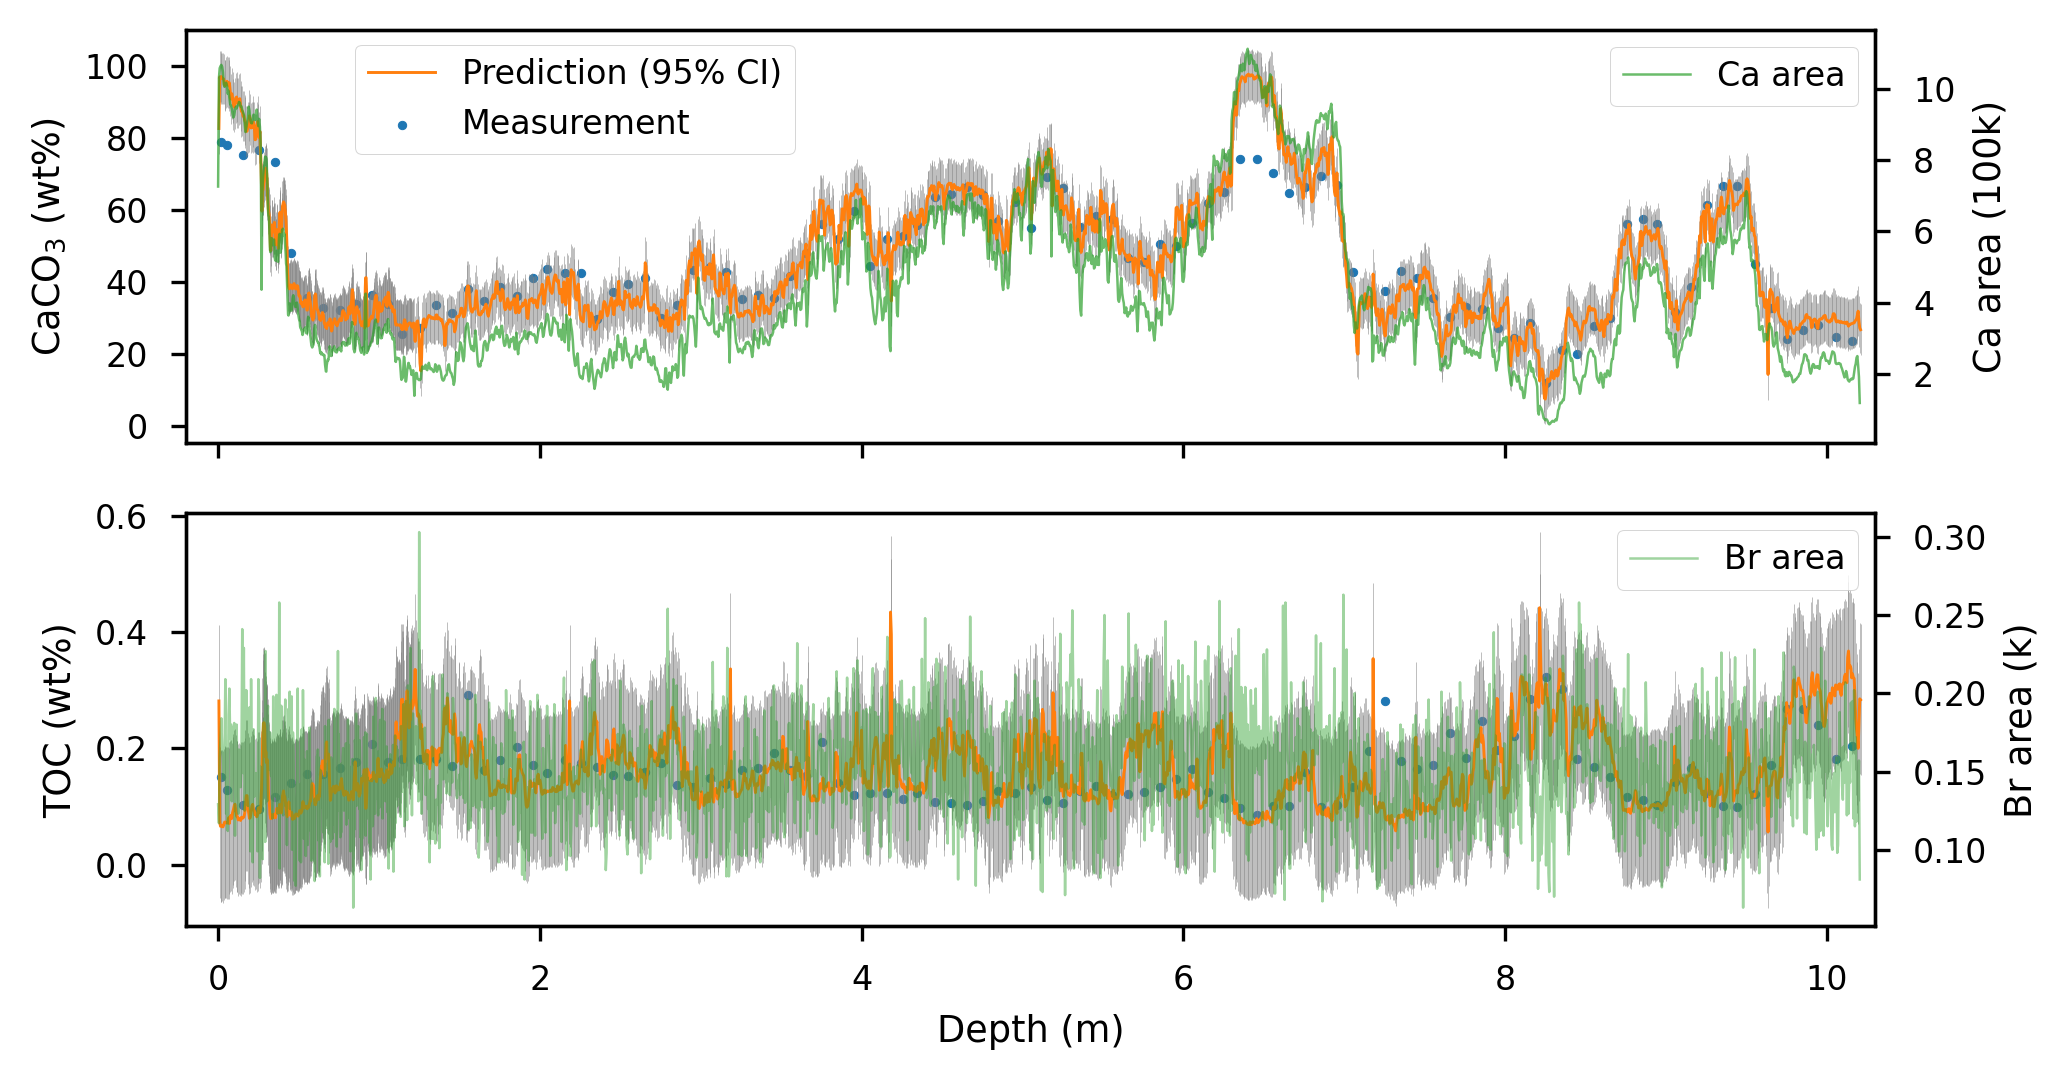

In [29]:
core = 'PS75-056-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]
aa = area_df[area_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.2, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')
    
    ax2 = ax.twinx()
    
    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.2, 10.3)
        ax.legend(loc=(.1, .7))
        ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7, label='Ca area')
        ax2.set_ylabel('Ca area (100k)')
        ax2.legend(loc='upper right')
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.45, label='Br area')
        ax2.set_ylabel('Br area (k)')
        ax2.legend(loc='upper right')
       

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

# Calculate CI from test set and case study

## Change the file name to be consistent
predictions_casestudies_20220702.csv --> y_case_preds_20220702.csv

In [2]:
y_df = pd.read_csv('results/y_dev_preds_20210823.csv', index_col=0)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CaCO3%       372 non-null    float64
 1   CaCO3%_pred  372 non-null    float64
 2   TOC%         394 non-null    float64
 3   TOC%_pred    394 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [3]:
y_df = pd.read_csv('results/predictions_casestudies_20220702.csv', index_col=0)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, SO264-69-2_00105 to LV28-44-3-n_11075
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   core          293 non-null    object 
 1   mid_depth_mm  293 non-null    float64
 2   TOC%          293 non-null    float64
 3   TOC%_pred     293 non-null    float64
 4   CaCO3%        291 non-null    float64
 5   CaCO3%_pred   291 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.0+ KB


In [4]:
y_df.to_csv('results/y_case_preds_20220702.csv')

## Merge ys from two datasets

In [5]:
y_df = pd.concat(
    [y_df, pd.read_csv('results/y_dev_preds_20210823.csv', index_col=0)],
    axis=0, join='outer')

y_df

,core,mid_depth_mm,TOC%,TOC%_pred,CaCO3%,CaCO3%_pred
SO264-69-2_00105,SO264-69-2,105.0,0.447396,0.161898,17.104352,9.643838
SO264-69-2_00205,SO264-69-2,205.0,0.682441,0.218412,3.896173,4.844910
SO264-69-2_00305,SO264-69-2,305.0,0.517439,0.138848,1.521280,0.506014
SO264-69-2_00405,SO264-69-2,405.0,0.512596,0.140063,1.728299,0.353026
SO264-69-2_00505,SO264-69-2,505.0,0.487851,0.139859,0.767879,0.329278
...,...,...,...,...,...,...
389,NaN,NaN,0.114739,0.172563,NaN,NaN
390,NaN,NaN,0.271875,0.258947,NaN,NaN
391,NaN,NaN,0.162681,0.199370,NaN,NaN
392,NaN,NaN,0.134584,0.140966,NaN,NaN


In [6]:
from sklearn.metrics import mean_squared_error

for measurement in ['CaCO3%', 'TOC%']:
    print(
        'RMSE',
        measurement, 
        mean_squared_error(
            y_df[measurement].dropna(), 
            y_df['{}_pred'.format(measurement)].dropna(),
            squared=False)
    )

RMSE CaCO3% 3.256313268229949
RMSE TOC% 0.24544253442379496


In [7]:
from scipy import stats

confidence = 0.95

for measurement in ['CaCO3%', 'TOC%']:

    err = (y_df['{}_pred'.format(measurement)].dropna() - y_df[measurement].dropna()).values
    mean, sigma = np.mean(err), np.std(err)
    conf_int = stats.t.interval(confidence, df=len(err)-1, loc=mean, scale=sigma)
    print(measurement, conf_int)


CaCO3% (-6.766615478157537, 5.910238821180132)
TOC% (-0.5405406125751289, 0.3040019840141711)


# Calculate RPIQ
RPIQ is based on quartiles, which better represents the spread of the population than standard deviation, which requires the assumption of normal distribution. It is defined as the ratio of the distance between the third quartile and the first to RMSE.

Bellon-Maurel, V., Fernandez-Ahumada, E., Palagos, B., Roger, J. M., & McBratney, A. (2010). A critical review of chemometric indicators commonly used for assessing the quality of the prediction of soil attributes by NIR spectroscopy. In TrAC - Trends in Analytical Chemistry. https://doi.org/10.1016/j.trac.2010.05.006

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rpiq(y_true, y_pred):
    iq = np.quantile(y_true, 0.75) - np.quantile(y_true, 0.25)
    rmse = mean_squared_error(y_true, y_pred, squared=True)
    return '{:.2f}\t{:.4f}\t{:.2f}'.format(iq, rmse, iq/rmse)


## Case study

In [24]:
y_df = pd.read_csv('results/y_case_preds_20220702.csv', index_col=0)
print('\tIQ\tRMSE\tRPIQ')
for measurement in ['CaCO3%', 'TOC%']:
    print(
        '{}\t{}'.format(
            measurement,rpiq(y_df[measurement].dropna(), y_df['{}_pred'.format(measurement)].dropna())
            )
    )

	IQ	RMSE	RPIQ
CaCO3%	1.01	7.8653	0.13
TOC%	0.33	0.1354	2.47


In [19]:
y_df.describe()

,mid_depth_mm,TOC%,TOC%_pred,CaCO3%,CaCO3%_pred
count,293.000000,293.000000,293.000000,291.000000,291.000000
mean,8898.003413,0.457687,0.175968,1.970390,1.022566
std,4359.996056,0.263273,0.037177,4.478292,2.163508
min,105.000000,0.120430,0.114558,0.010000,0.175556
25%,6175.000000,0.280381,0.149996,0.290000,0.306991
50%,8625.000000,0.364715,0.165380,0.523865,0.369104
75%,11105.000000,0.614500,0.201476,1.295106,0.586586
max,18405.000000,1.258500,0.282519,31.328497,16.147309


## Test set

In [23]:
y_df = pd.read_csv('results/y_dev_preds_20210823.csv', index_col=0)
print('\tIQ\tRMSE\tRPIQ')
for measurement in ['CaCO3%', 'TOC%']:
    print(
        '{}\t{}'.format(
            measurement,rpiq(y_df[measurement].dropna(), y_df['{}_pred'.format(measurement)].dropna())
            )
    )

	IQ	RMSE	RPIQ
CaCO3%	16.54	12.7456	1.30
TOC%	0.10	0.0043	23.80


In [21]:
y_df.describe()

,CaCO3%,CaCO3%_pred,TOC%,TOC%_pred
count,372.000000,372.000000,394.000000,394.000000
mean,12.230391,12.208692,0.189139,0.192420
std,18.861152,19.559700,0.139706,0.137969
min,0.006414,0.085754,0.032263,0.028176
25%,0.618112,0.549384,0.110841,0.118173
50%,1.923510,1.445450,0.161972,0.164672
75%,17.155302,17.908167,0.213846,0.220718
max,87.822175,88.799107,1.130000,1.137965
